In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Convergence to Expectation (v1)
In this version, the generation in rerun for each max size

In [2]:
np.random.seed(100)

max_size = 500

size_array= np.arange(max_size)
avg_array = np.zeros(max_size)

for size in size_array:
    np.random.seed(100+37*size)
    chi_2 = np.random.chisquare(df=4, size=size+1)
    avg_array[size] = chi_2.mean()

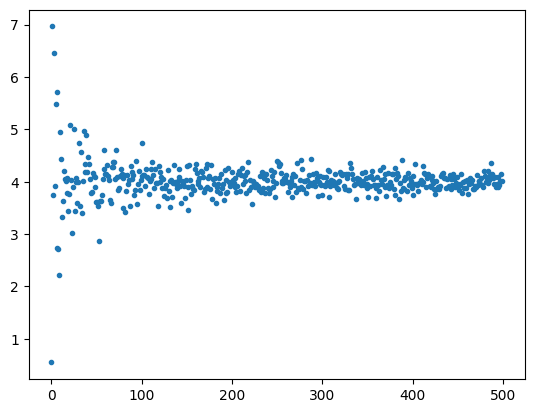

In [3]:
plt.scatter(size_array,avg_array, marker='.')
plt.show()

# Convergence to Expectation (v2)
a. In this version, the cumulative average is used (i.e. a single random sequence is used)

In [4]:
# Set seed for reproducibility
np.random.seed(1212)
size = 500              # sample size
df = 4                  # chi2 dof

x = np.random.chisquare(df=df, size=size)
s = np.cumsum(x)                # cumulative sum
r = s / np.arange(1, size + 1)       # elementwise division for running averages

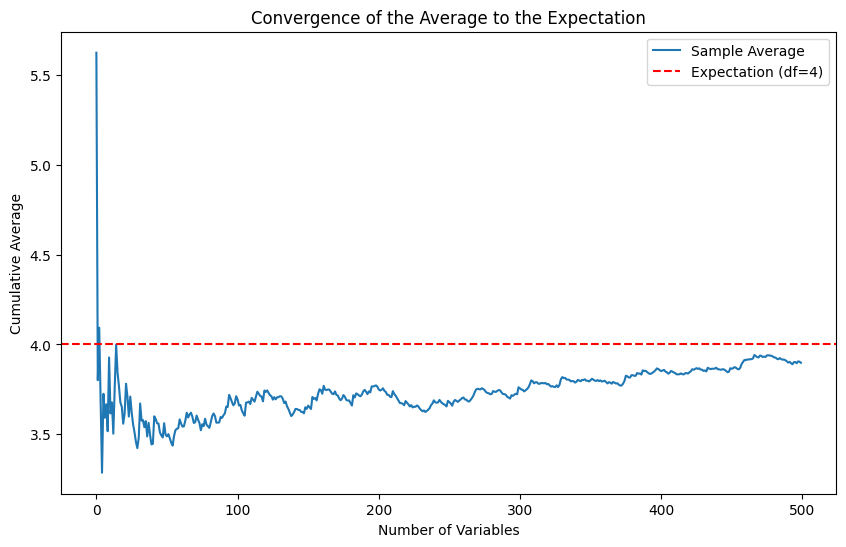

Final average: 3.8980893945033963


In [5]:
# Plot the simulation
plt.figure(figsize=(10, 6))
plt.plot(r, label="Sample Average")
plt.axhline(df, color="red", linestyle="--", label="Expectation (df=4)")
plt.title("Convergence of the Average to the Expectation")
plt.xlabel("Number of Variables")
plt.ylabel("Cumulative Average")
plt.legend()
plt.show()

print("Final average:", r[-1])

# Monte Carlo distribution of final averages

b. Here we use 1000 MC iterations for a sample of 500 random variables

In [6]:
# Monte Carlo: Distribution of final averages
m = 1000                        # number of simulation iterations
p_last = np.empty(m)            # initialize vector to store final averages

for i in range(m):
    x = np.random.chisquare(df=df, size=size)
    s = np.cumsum(x)                # cumulative sum
    r = s / np.arange(1, size + 1)       # elementwise division for running averages
    p_last[i] = r[-1]

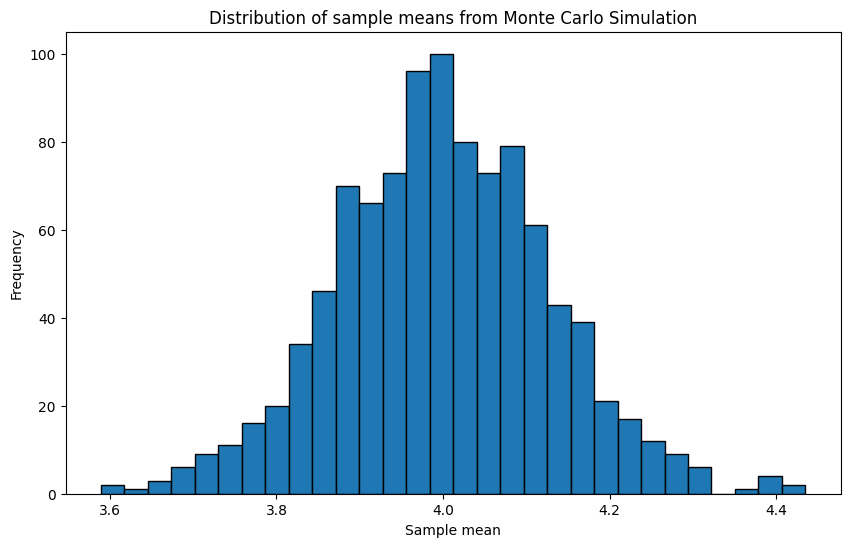

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(p_last, bins=30, edgecolor="black")
plt.title("Distribution of sample means from Monte Carlo Simulation")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.show()

c. Here we use 1000 MC iterations for a sample of 10, 100, 1000 and 100000

In [8]:
def mc_simulation(sample_size, iterations):
    mean_array = np.empty(iterations)            # initialize vector to store final averages
    
    for i in range(iterations):
        generated_values = np.random.chisquare(df=df, size=sample_size)
        cumulative_sum = np.cumsum(generated_values)                # cumulative sum
        running_mean = cumulative_sum / np.arange(1, sample_size + 1)       # elementwise division for running averages
        mean_array[i] = running_mean[-1]
    
    return mean_array
    

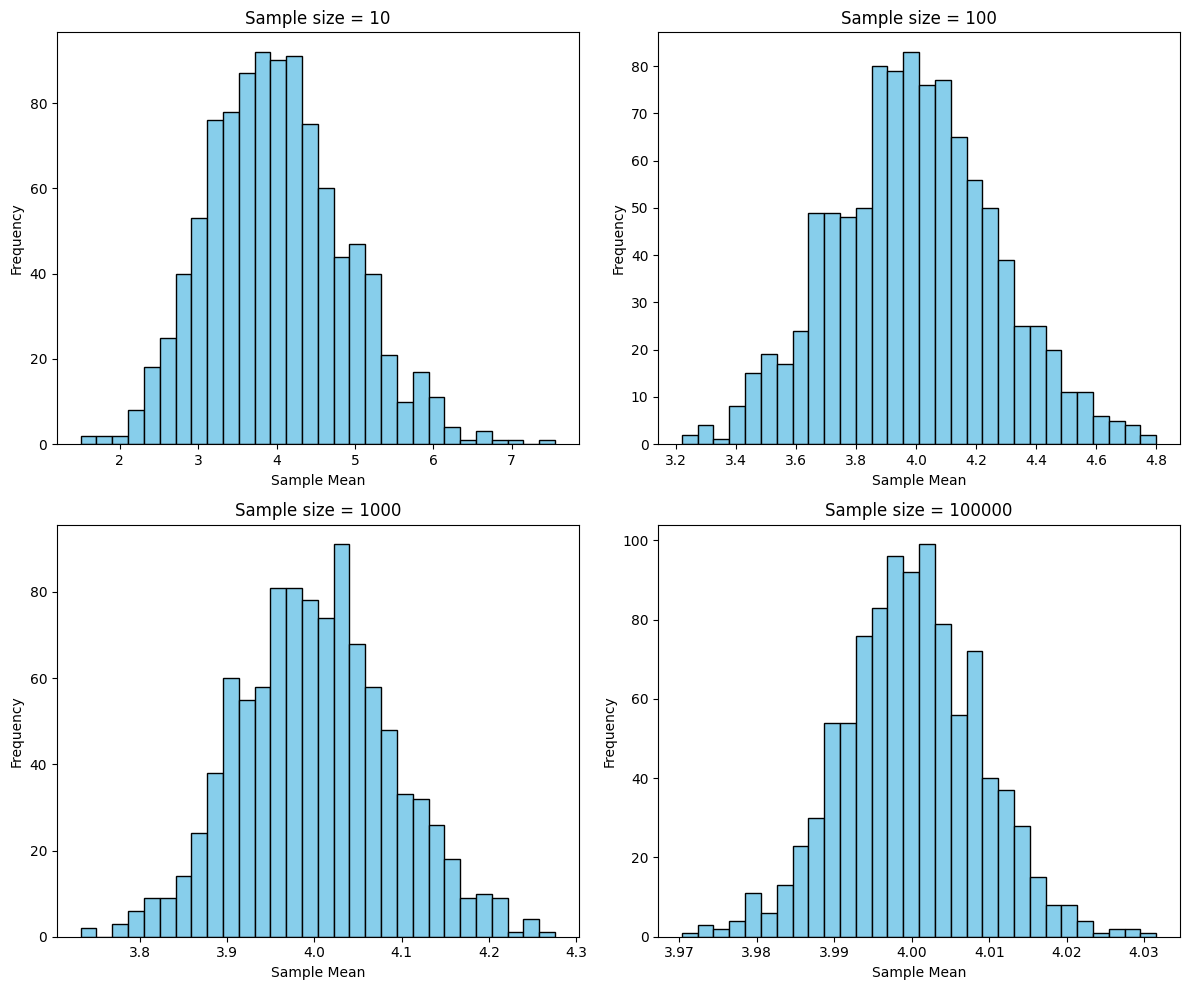

In [9]:
# Define the simulation parameters.
sample_sizes = [10, 100, 1000, 100000]
iterations = 1000

# Run the simulations for each sample size.
results = {size: mc_simulation(size, iterations) for size in sample_sizes}

# Create a figure with 4 subplots.
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration.

# Plot a histogram for each sample size.
for i, size in enumerate(sample_sizes):
    axs[i].hist(results[size], bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Sample size = {size}')
    axs[i].set_xlabel('Sample Mean')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


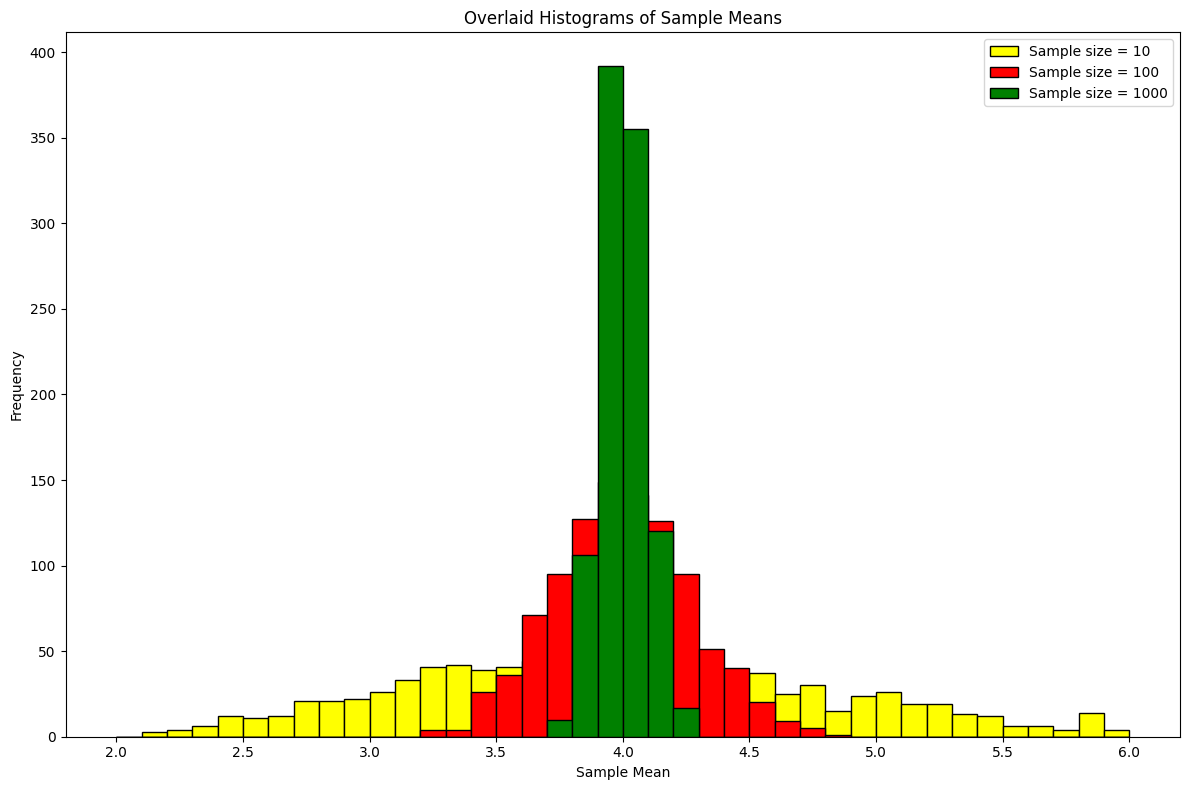

In [10]:
# Create a single figure overlaying the 4 histograms.
plt.figure(figsize=(12, 8))
colors = ['yellow', 'red', 'green', 'skyblue']

bin_edges = np.arange(2, 6 + 0.1, 0.1)

for size, color in zip(sample_sizes[:-1], colors[:-1]):
    plt.hist(results[size], bins =bin_edges, color=color, alpha=1, 
             label=f'Sample size = {size}', edgecolor='black')

plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Overlaid Histograms of Sample Means')
plt.legend()
plt.tight_layout()
plt.show()

We can observe that the variance of the distribution of averages decreases as the sample size increases: the histograms get slimmer around the population mean of 4. This suggests that the CLT holds for the Chi-square distribution.

# Cauchy Distribution
d. Because the population mean of the Cauchy distribution is not defined, the sample mean does not converge and we can observe the characteristic jumps.

In [11]:
np.random.seed(1212)
size = 100000              # sample size

x = np.random.standard_cauchy(size=size)
s = np.cumsum(x)                # cumulative sum
r = s / np.arange(1, size + 1)  

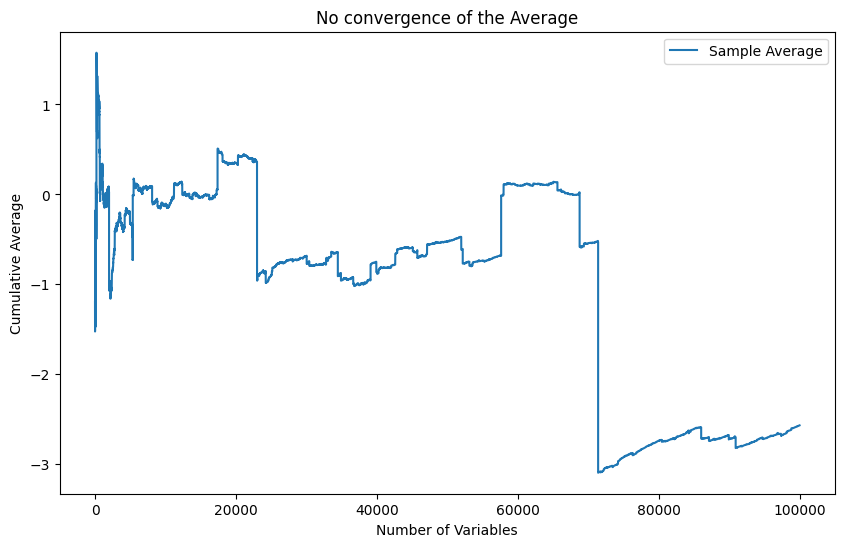

Final average: -2.5673072399462145


In [12]:
# Plot the simulation
plt.figure(figsize=(10, 6))
plt.plot(r, label="Sample Average")
plt.title("No convergence of the Average")
plt.xlabel("Number of Variables")
plt.ylabel("Cumulative Average")
plt.legend()
plt.show()

print("Final average:", r[-1])

In [13]:
def mc_simulation_cauchy(sample_size, iterations):
    mean_array = np.empty(iterations)            # initialize vector to store final averages
    
    for i in range(iterations):
        generated_values = np.random.standard_cauchy(size=sample_size)
        cumulative_sum = np.cumsum(generated_values)                # cumulative sum
        running_mean = cumulative_sum / np.arange(1, sample_size + 1)       # elementwise division for running averages
        mean_array[i] = running_mean[-1]
    
    return mean_array

In [14]:
# Define the simulation parameters.
sample_sizes = [10, 100, 1000, 100000]
iterations = 1000

# Run the simulations for each sample size.
results = {size: mc_simulation_cauchy(size, iterations) for size in sample_sizes}

For Cauchy distribution, the CLT does not hold, i.e. more iterations does not lead to lower variance on the distribution of averages, because the population mean is not defined.

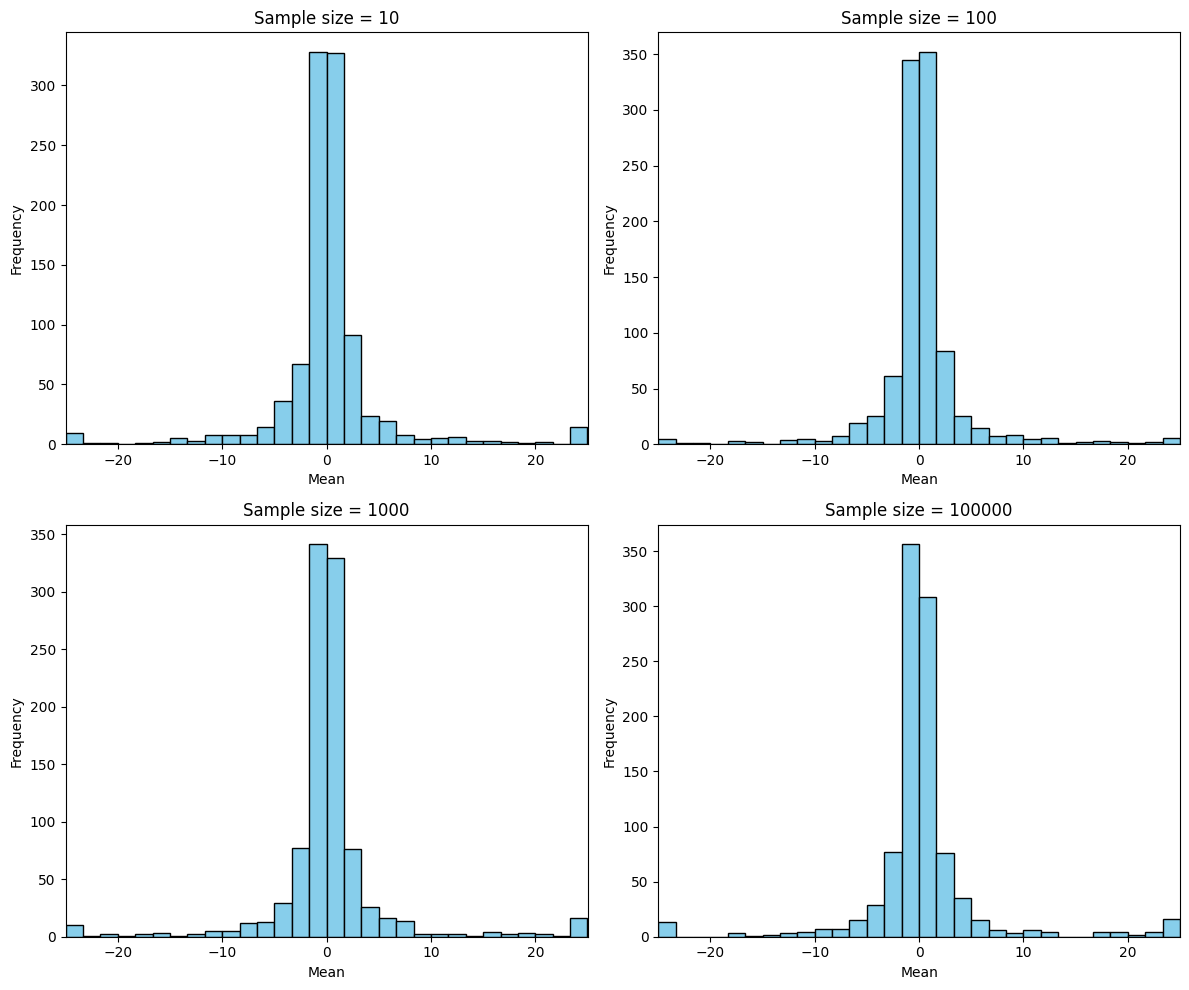

In [15]:
radius =25
# Create a figure with 4 subplots.
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration.

# Plot a histogram for each sample size.
for i, size in enumerate(sample_sizes):
    axs[i].hist(np.clip(results[size],-radius,radius), bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Sample size = {size}')
    axs[i].set_xlabel('Mean')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim([-radius,radius])

plt.tight_layout()
plt.show()